## Autograd

In [12]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
row = 5
col = 3

In [3]:
tensor_1 = torch.ones(row,col)

In [4]:
x1 = Variable( tensor_1, requires_grad=True )
print(x1)

Variable containing:
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 5x3]



Variable is used to specify a computation graph, and also the accumulatioin of gradients.

They keep track of what created them.



In [5]:
x2 = x1 + 1
print(x2)

Variable containing:
 2  2  2
 2  2  2
 2  2  2
 2  2  2
 2  2  2
[torch.FloatTensor of size 5x3]



In [6]:
print( x2.grad_fn, x2._version )

<AddBackward0 object at 0x10cd1f240> 0


### Autograd

Backprop is basically chain rule of derivatives.

Autograd does it.

In [7]:
tensor_3 = torch.Tensor( np.linspace(0,2*np.pi,10) )
print(tensor_3)
x_3 = Variable( tensor_3, requires_grad=True )
print(x_3)
y_3 = torch.sin(x_3)
print(x_3)


 0.0000
 0.6981
 1.3963
 2.0944
 2.7925
 3.4907
 4.1888
 4.8869
 5.5851
 6.2832
[torch.FloatTensor of size 10]

Variable containing:
 0.0000
 0.6981
 1.3963
 2.0944
 2.7925
 3.4907
 4.1888
 4.8869
 5.5851
 6.2832
[torch.FloatTensor of size 10]

Variable containing:
 0.0000
 0.6981
 1.3963
 2.0944
 2.7925
 3.4907
 4.1888
 4.8869
 5.5851
 6.2832
[torch.FloatTensor of size 10]



In [10]:
print(x_3.grad)

Variable containing:
 1.0000
 0.7660
 0.1736
-0.5000
-0.9397
-0.9397
-0.5000
 0.1736
 0.7660
 1.0000
[torch.FloatTensor of size 10]



In [8]:
y_3.backward( torch.Tensor( np.ones(10) ) )

None

 0.0000
 0.6428
 0.9848
 0.8660
 0.3420
-0.3420
-0.8660
-0.9848
-0.6428
 0.0000
[torch.FloatTensor of size 10]


 1.0000
 0.7660
 0.1736
-0.5000
-0.9397
-0.9397
-0.5000
 0.1736
 0.7660
 1.0000
[torch.FloatTensor of size 10]



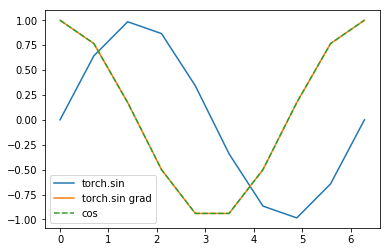

In [23]:
plt.plot(x_3.data.numpy(), y_3.data.numpy(), label="torch.sin" )
plt.plot( x_3.data.numpy(), x_3.grad.data.numpy() , label="torch.sin grad" )
plt.plot( x_3.data.numpy(), np.cos(x_3.data.numpy() ) , '--',label="cos")
plt.legend()